In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from HelpfulFunctions import clean_and_convert_data
# some display settings for notebook
pd.set_option("display.max_columns",None)
sns.set_theme()

In [3]:
#We want to understand the data and see if there any outliers

game_df = clean_and_convert_data('game_season_cleaned.csv')
game_df.sample(5)


#game_df.info()
game_df.sample(5,random_state=0)

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,kickoff_date,kickoff_hour,matchgames,previous_points,previous_TotalTeamPoints
27521,Deniz Undav,FWD,Brighton,0.0,1,2,36,0,10.3,123,0.02000,0.46000,0.4400,0.2200,351,0,1,8.2,40.4,2023-05-14 15:30:00+00:00,8,1,0,0,0,0,36,0,37052,0,3,0,31.0,10,1395,3340,1945,50,False,0,36,2023-05-14,15,35,10.0,71.0
10053,Mohamed Salah,MID,Liverpool,8.0,0,0,4,0,11.4,283,0.04975,0.88115,0.8314,0.9925,174,1,0,7.4,11.0,2022-12-30 20:00:00+00:00,90,10,0,0,0,0,18,0,3793703,1,1,2,52.0,2,181941,194471,12530,128,True,0,18,2022-12-30,20,16,12.0,56.0
8928,Kobbie Mainoo,MID,Man Utd,0.0,0,0,0,0,0.0,643,0.00000,0.00000,0.0000,0.0000,153,0,0,0.0,0.0,2022-11-13 16:30:00+00:00,0,9,0,0,0,0,16,0,233,0,2,1,0.0,0,12,34,22,45,False,0,16,2022-11-13,16,6,0.0,20.0
934,Marc Albrighton,MID,Leicester,-0.5,0,0,0,0,0.0,251,0.00000,0.00000,0.0000,0.0000,11,0,0,0.0,0.0,2022-08-13 14:00:00+00:00,0,1,0,0,0,0,2,0,10698,0,2,4,0.0,0,-792,1194,1986,50,False,0,2,2022-08-13,14,2,0.0,38.0
22476,Vitaly Janelt,MID,Brentford,0.5,0,0,5,0,11.8,86,0.02000,0.02000,0.0000,0.3100,310,1,0,1.8,3.8,2023-04-15 14:00:00+00:00,29,20,0,0,0,0,31,0,13826,0,0,2,2.0,1,20,254,234,55,False,0,31,2023-04-15,14,31,1.0,26.0


In [21]:
#swapset of GW and row_count

trendviolin = (game_df[['position','GW','was_home','matchgames','round','kickoff_time','minutes','name','total_points','transfers_balance','transfers_in', 'transfers_out' ,'value']]
                .assign(was_home_ind =lambda x:game_df['was_home'].replace({False: 0,True:1}))
                # .drop('was_home',axis=1)                
                )
trendviolin.sample(5)

,position,GW,was_home,matchgames,round,kickoff_time,minutes,name,total_points,transfers_balance,transfers_in,transfers_out,value,was_home_ind
17959,MID,27,True,26,27,2023-03-11 12:30:00+00:00,20,Ryan Christie,1,77,182,105,53,1
11748,GK,20,False,18,20,2023-01-14 12:30:00+00:00,90,Ederson Santana de Moraes,1,61023,101411,40388,54,0
8294,DEF,15,True,14,15,2022-11-06 14:00:00+00:00,90,Tyrone Mings,1,-26205,5721,31926,43,1
5992,MID,12,False,10,12,2022-10-20 19:15:00+00:00,74,Luis Sinisterra Lucumí,2,8767,11288,2521,65,0
2160,GK,4,False,4,4,2022-08-27 14:00:00+00:00,0,Asmir Begović,0,-603,2308,2911,40,0


[Text(0.5, 1.0, 'Value of players per positions')]

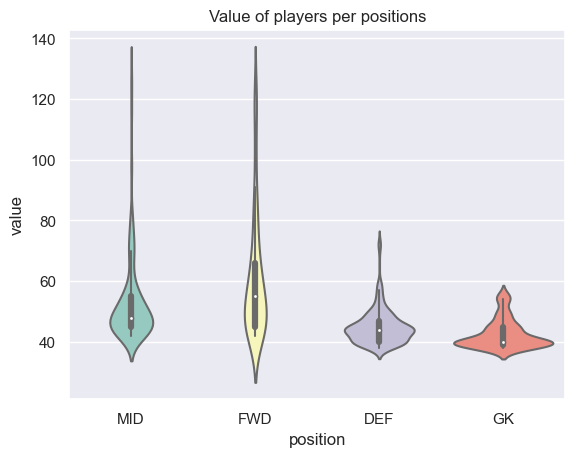

In [23]:
#choosing a round 20 to view the dis

sns.violinplot( x="position"
                ,y="value"
                #,hue='was_home'
                , data=trendviolin.query(" round ==20")
                , palette="Set3"
                # ,split=True
                # , bw=.2
                # , cut=1
                # , linewidth=1
                ).set(title='Value of players per positions')


[Text(0.5, 1.0, 'Scatter plot of Points earned and Price point of player')]

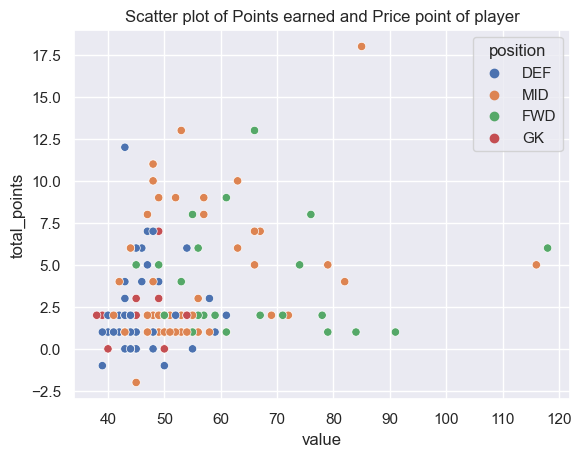

In [28]:
#scatter plot between Value of the player and the points accumalated.

sns.scatterplot(x="value"
                ,y="total_points"
                ,hue="position"
                ,data=trendviolin.query("round ==28 & minutes >0")
                ,).set(title='Scatter plot of Points earned and Price point of player')


[Text(0.5, 1.0, 'Scatter plot of Points earned and Price point of player')]

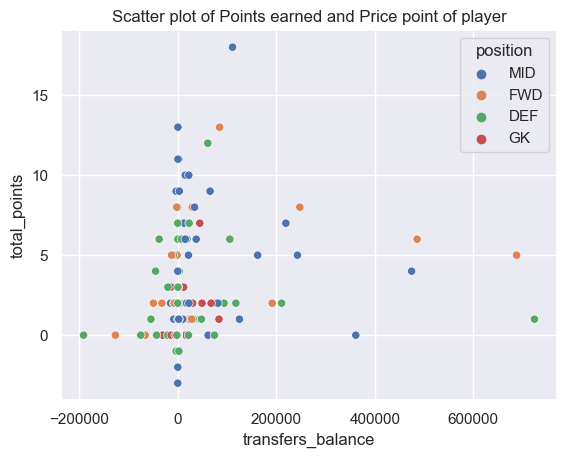

In [32]:
#Player Movements against total points

sns.scatterplot(x="transfers_balance"
                ,y="total_points"
                ,hue="position"
                ,data=trendviolin.query("round ==28 ")
                ,).set(title='Scatter plot of Points earned and Price point of player')



[Text(0.5, 1.0, 'Scatter plot of Points earned and Price point of player')]

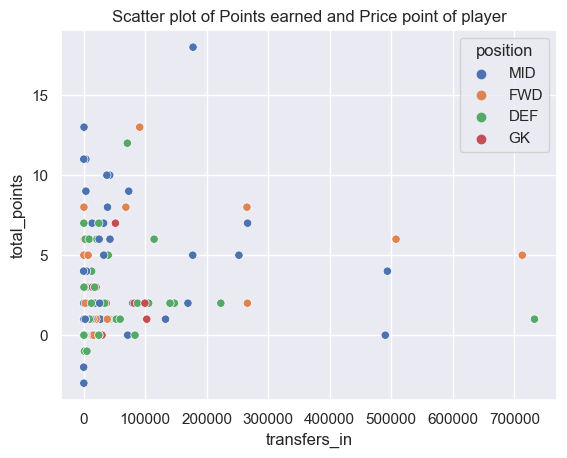

In [33]:
# total points a player gets tied to transfers in

sns.scatterplot(x="transfers_in"
                ,y="total_points"
                ,hue="position"
                ,data=trendviolin.query("round ==28 ")
                ,).set(title='Scatter plot of Points earned and Price point of player')


[Text(0.5, 1.0, 'Scatter plot of Points earned and Price point of player')]

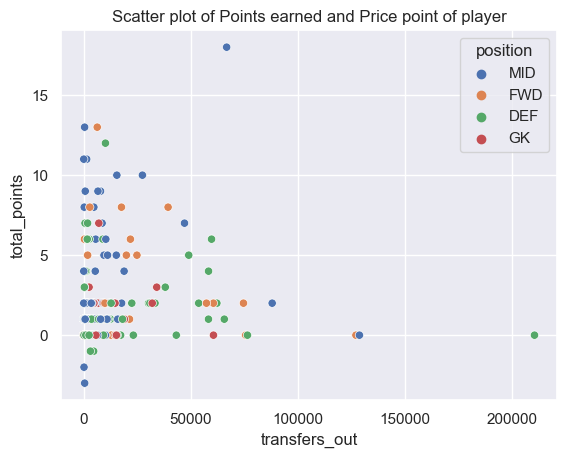

In [34]:
#Same view for transfer out, trying to see if there is any influence on output.
sns.scatterplot(x="transfers_out"
                ,y="total_points"
                ,hue="position"
                ,data=trendviolin.query("round ==28 ")
                ,).set(title='Scatter plot of Points earned and Price point of player')


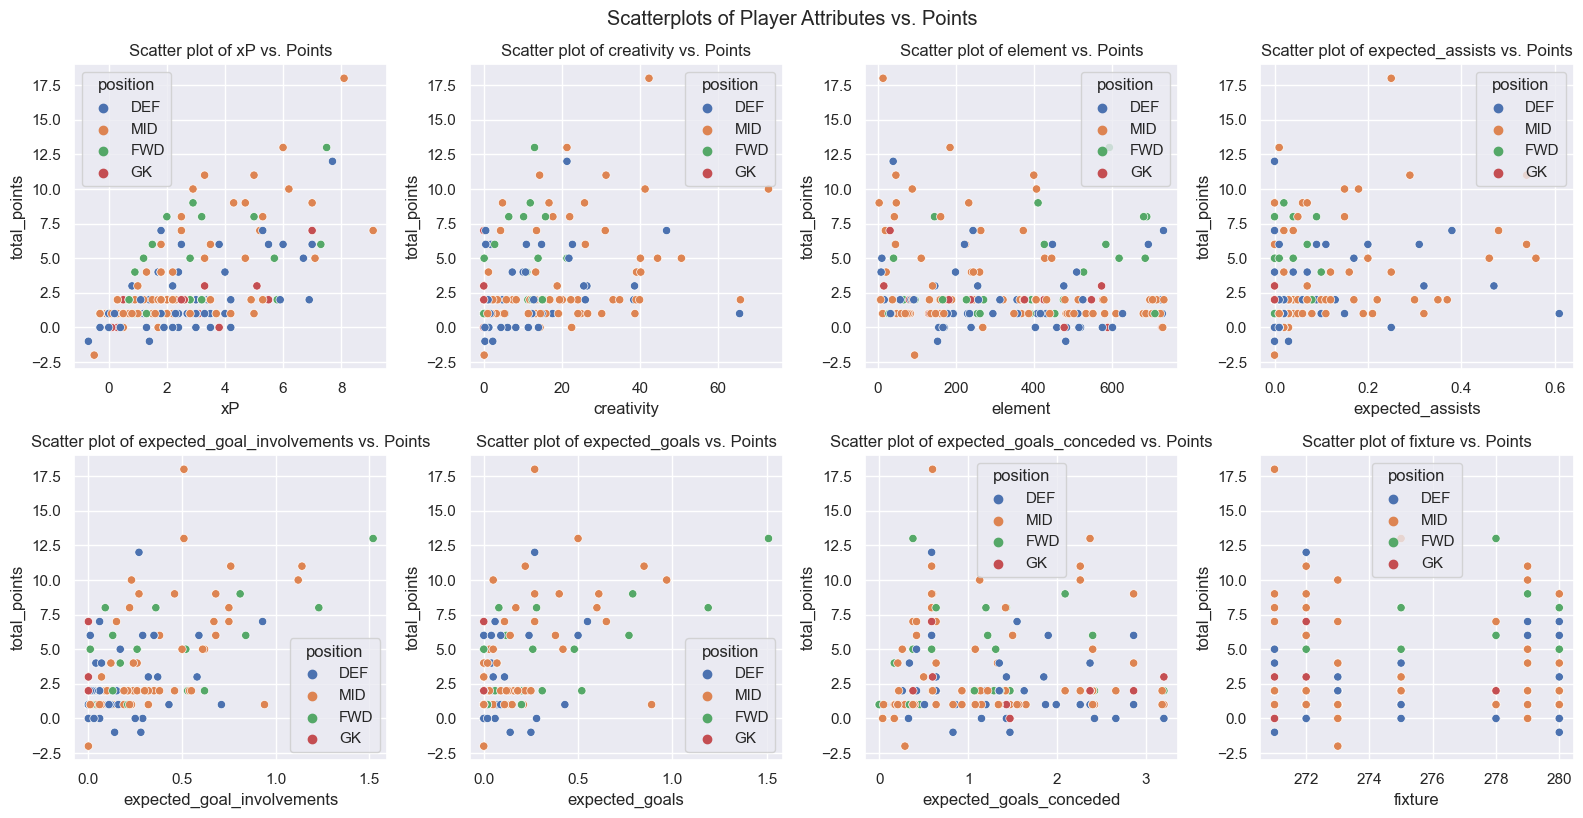

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of fields to compare
fields_to_compare = ['xP', 'creativity', 'element', 'expected_assists', 'expected_goal_involvements', 'expected_goals', 'expected_goals_conceded', 'fixture']

# Create a grid of scatterplots with Matplotlib
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns grid

# Iterate through the fields and create scatterplots
for i, field in enumerate(fields_to_compare):
    row = i // 4  # Calculate row index
    col = i % 4   # Calculate column index

    # Create a scatterplot for the current field
    sns.scatterplot(x=field, y="total_points", hue="position",
                    data=game_df.query("round == 28 & minutes > 0"),
                    ax=axes[row, col])
    
    # Set title for the subplot
    axes[row, col].set_title(f'Scatter plot of {field} vs. Points')

# Adjust layout
plt.tight_layout()

# Set overall title for the entire grid
plt.suptitle('Scatterplots of Player Attributes vs. Points', y=1.02)

# Show the grid of scatterplots
plt.show()

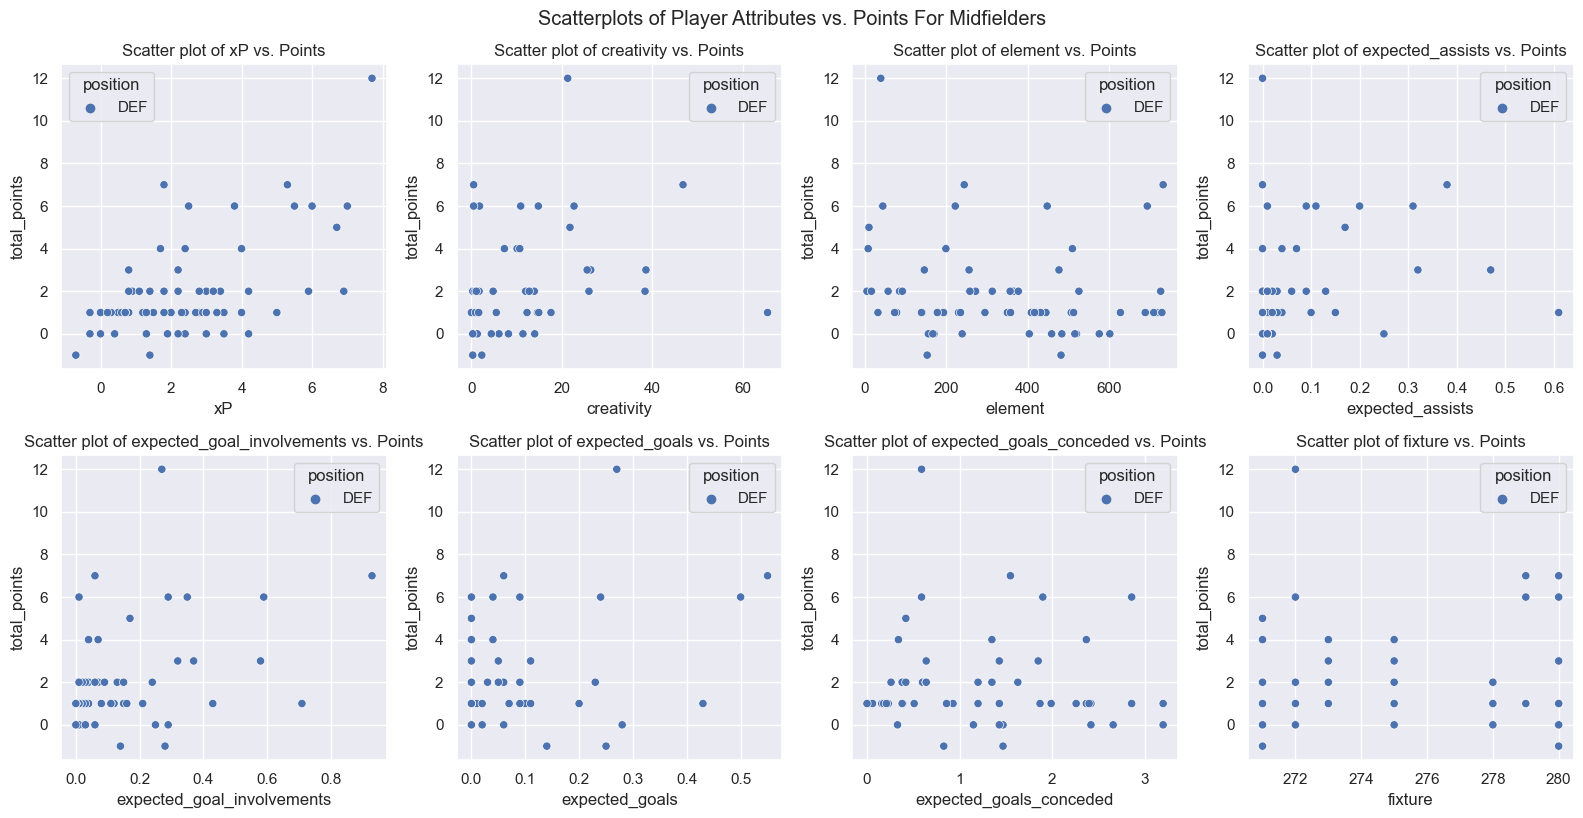

In [40]:
#lets focus on Midfielders

# List of fields to compare
fields_to_compare = ['xP', 'creativity', 'element', 'expected_assists', 'expected_goal_involvements', 'expected_goals', 'expected_goals_conceded', 'fixture']

# Create a grid of scatterplots with Matplotlib
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns grid

# Iterate through the fields and create scatterplots
for i, field in enumerate(fields_to_compare):
    row = i // 4  # Calculate row index
    col = i % 4   # Calculate column index

    # Create a scatterplot for the current field
    sns.scatterplot(x=field, y="total_points", hue="position",
                    data=game_df.query("round == 28 & minutes > 0 & position == 'DEF' "),
                    ax=axes[row, col])
    
    # Set title for the subplot
    axes[row, col].set_title(f'Scatter plot of {field} vs. Points')

# Adjust layout
plt.tight_layout()

# Set overall title for the entire grid
plt.suptitle('Scatterplots of Player Attributes vs. Points For Midfielders', y=1.02)

# Show the grid of scatterplots
plt.show()